# Plot Embeddings

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
from arqmath_code.topic_file_reader import TopicReader, Topic
from src.pre_processors.remove_xml_tags import RemoveXMLTagsFromQueries

In [2]:
embeddings_with_tags = np.load("../arqmath_dataset/model_embeddings/document_embeddings_all-MiniLM-L6-v2-with-tags.npy")
embeddings_without_tags = np.load("../arqmath_dataset/model_embeddings/document_embeddings_all-MiniLM-L6-v2-without-tags.npy")

In [8]:
topics = list(TopicReader("../arqmath_dataset/Topics/Topics_Task1_2022_V0.1.xml").map_topics.values())
model = SentenceTransformer("all-MiniLM-L6-v2")
topic_embeddings = model.encode([topic.title for topic in topics])

In [13]:
topics_without_tags = RemoveXMLTagsFromQueries()(queries=topics)
topic_embeddings_without_tags = model.encode([topic.title for topic in topics])

In [14]:
pca = PCA(n_components=2)
with_tags_transformed = pd.DataFrame(pca.fit_transform(embeddings_with_tags))
without_tags_transformed = pd.DataFrame(pca.fit_transform(embeddings_without_tags))
topics_transformed = pd.DataFrame(pca.fit_transform(topic_embeddings))
topics_without_tags_transformed = pd.DataFrame(pca.fit_transform(topic_embeddings_without_tags))
with_tags_transformed

,0,1
0,-0.100525,-0.075867
1,-0.082184,0.010458
2,-0.102991,-0.050695
3,-0.231468,0.022862
4,-0.133633,0.084076
...,...,...
1020580,-0.160431,-0.101970
1020581,-0.176667,0.066868
1020582,-0.272124,-0.146197
1020583,-0.171742,0.337151


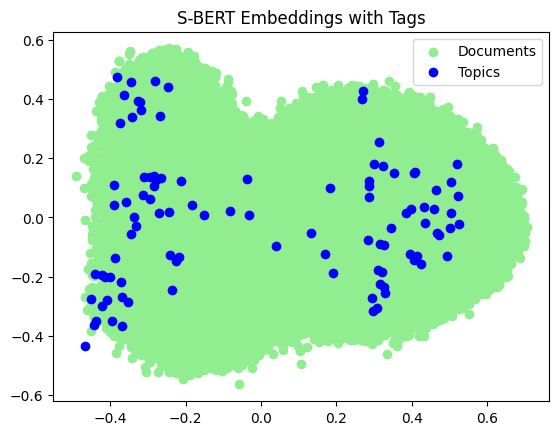

In [22]:
plt.scatter(with_tags_transformed[0], with_tags_transformed[1], label="Documents", c="lightgreen")
plt.scatter(topics_transformed[0], topics_transformed[1], label="Topics", c="blue")
plt.title("S-BERT Embeddings with Tags")
plt.legend()
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/IR/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


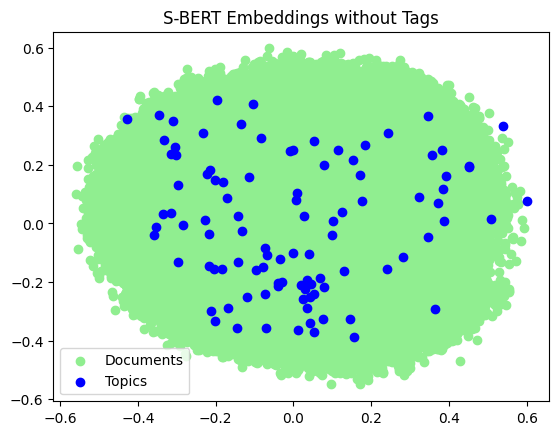

In [24]:
plt.scatter(without_tags_transformed[0], without_tags_transformed[1], label="Documents", c="lightgreen")
plt.scatter(topics_without_tags_transformed[0], topics_without_tags_transformed[1], label="Topics", c="blue")
plt.title("S-BERT Embeddings without Tags")
plt.legend()
plt.show()

# Plot results

In [18]:
res_df = pd.read_csv("../results/complete_results_v1.tsv", sep='\t')
res_df

,System,nDCG',mAP',p@10
0,lda_200,0.084163,0.023414,0.088327
1,lda,0.065576,0.015154,0.087091
2,tf-idf-test,0.004785,0.001321,0.002564
3,pyterrier-bm25,0.003074,0.000462,0.005263
4,pyterrier-tf-idf,0.055545,0.011563,0.064924
5,SBert-Cross-Encoder-Without-Tags,0.180882,0.041888,0.128550
6,SBert-Cross-Encoder,0.128694,0.032553,0.140237
7,SBert,0.165728,0.036294,0.114267
8,SBertWithoutTags,0.200459,0.044785,0.110372
9,baseline_task1_tf_idf_pyterrier,0.191937,0.035951,0.066223


<AxesSubplot: title={'center': 'System Comparison'}, ylabel='System'>

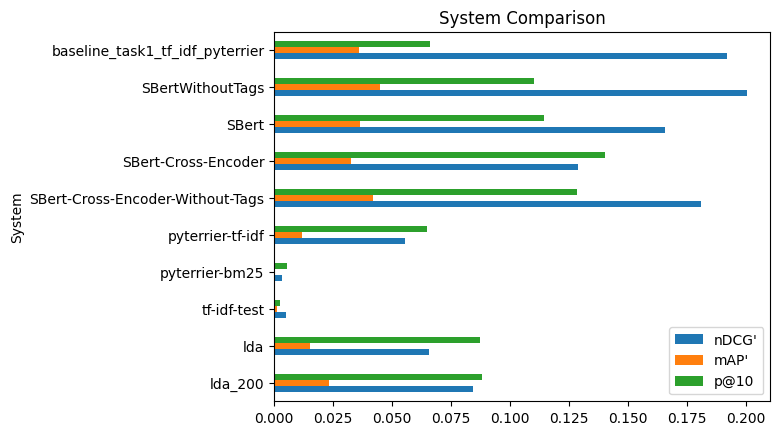

In [26]:
res_df.plot.barh(x='System', title='System Comparison')